In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartdeases/updated_dataset.csv


In [2]:
import os

# Define base path and folder names
base_path = "/kaggle/working"
folders = ["QIIMGA", "PCA", "Comparison"]

# Create directories
for folder in folders:
    dir_path = os.path.join(base_path, folder)
    try:
        os.makedirs(dir_path, exist_ok=True)
        print(f"Successfully created directory: {dir_path}")
    except Exception as e:
        print(f"Error creating directory {dir_path}: {e}")

Successfully created directory: /kaggle/working/QIIMGA
Successfully created directory: /kaggle/working/PCA
Successfully created directory: /kaggle/working/Comparison


INPUT Features Dataset

1. install qiskit libary for quantum circuit creation

In [2]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 37.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 26.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.2 MB/s eta 0:00:00


2. Insatall qiskit-aer libary for quantum simulation

In [3]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 82.9 MB/s eta 0:00:00:00:01:01


In [4]:
# Show Quiskit installed or not
!pip show qiskit

Name: qiskit
Version: 1.3.2
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer


In [5]:
# show quiskit-aer install or not
!pip show qiskit-aer

Name: qiskit-aer
Version: 0.16.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [6]:
# check the version and upgrade it
pip install qiskit qiskit-aer --upgrade --force-reinstall


  Using cached qiskit-1.3.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_aer-0.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.2 kB)
  Using cached rustworkx-0.16.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
  Using cached stevedore-5.4.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached symengine-0.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached pbr-6.1.1-py2.py3-none-any.whl.metadata (3.4 kB)
Using cached qiskit-1.3.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.8 MB)
Using cached qiskit_aer-0.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━

A. QIIMGA ALgorithm Developed with Testing steps 

     Step 1 : feature selection using QIIMGA algo
     Step 2 : filered the original data set accoring to selected features for QIIMGA
     Step 3 : Trained model according to the selected_features dataset also perfrom cross   validation for check your model performance
     Step 4:  seperately check using predefined data
     

Step 1 : feature selection using QIIMGA algo

In [21]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import random
import numpy as np
from sklearn.svm import SVC


# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# QuantumChromosome class definition
class QuantumChromosome:
    def __init__(self, num_features):
        self.num_features = num_features
        self.circuit = QuantumCircuit(num_features)

        # Apply Hadamard gate to all qubits
        for qubit in range(num_features):
            self.circuit.h(qubit)

        # Initialize alpha and beta values
        self.alpha = [1 / np.sqrt(2)] * num_features
        self.beta = [1 / np.sqrt(2)] * num_features

    def measure(self):
        self.circuit.measure_all()
        simulator = AerSimulator()
        job = simulator.run(self.circuit, shots=1)
        result = job.result()
        counts = result.get_counts(self.circuit)

        # Return the measurement as a binary list
        measurement = list(counts.keys())[0]
        return [int(bit) for bit in measurement]

    def update_rotation(self, fitness_score, threshold=0.5):
        for i in range(self.num_features):
            delta_theta = np.pi / 8 if fitness_score > threshold else -np.pi / 8
            cos_theta = np.cos(delta_theta)
            sin_theta = np.sin(delta_theta)

            new_alpha = cos_theta * self.alpha[i] - sin_theta * self.beta[i]
            new_beta = sin_theta * self.alpha[i] + cos_theta * self.beta[i]

            self.alpha[i] = new_alpha
            self.beta[i] = new_beta

            self.circuit.ry(2 * delta_theta, i)

    def mutate(self):
        mutation_point = random.randint(0, self.num_features - 1)
        self.circuit.x(mutation_point)

# Fitness function
def fitness_function(chromosome, X_train, y_train, X_test, y_test, lambda_param=0.01, min_features=2):
    selected_features = [i for i, bit in enumerate(chromosome) if bit == 1]
    
    if len(selected_features) < min_features:
        return -1  # Penalize under-selection

    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    model = SVC(kernel='linear', C=1.0, max_iter=5000)
    model.fit(X_train_selected, y_train)
    accuracy = model.score(X_test_selected, y_test)

    penalty = lambda_param * len(selected_features)
    return accuracy - penalty

# Quantum-Inspired Genetic Algorithm (QIGA)
def QIGA(X_train, y_train, X_test, y_test, num_features, feature_names, generations=20, population_size=20, lambda_param=0.01, min_features=2):
    population = [QuantumChromosome(num_features) for _ in range(population_size)]

    best_fitness = float('-inf')
    best_features = None
    best_feature_names = None
    best_circuit = None

    for generation in range(generations):
        classical_population = [chromosome.measure() for chromosome in population]
        fitness_scores = [fitness_function(chromosome, X_train, y_train, X_test, y_test, lambda_param, min_features) for chromosome in classical_population]

        best_chromosome_index = np.argmax(fitness_scores)
        current_best_fitness = fitness_scores[best_chromosome_index]

        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_features = classical_population[best_chromosome_index]
            best_feature_names = [feature_names[i] for i in range(num_features) if best_features[i] == 1]
            best_circuit = population[best_chromosome_index].circuit

        selected_population = [population[i] for i in np.argsort(fitness_scores)[-population_size//2:]]

        next_generation = []
        while len(next_generation) < population_size:
            parent1, parent2 = random.sample(selected_population, 2)
            crossover_point = random.randint(0, num_features - 1)
            child1, child2 = QuantumChromosome(num_features), QuantumChromosome(num_features)

            for i in range(num_features):
                if i < crossover_point:
                    child1.circuit.x(i)
                    child2.circuit.x(i)
                else:
                    child1.circuit.h(i)
                    child2.circuit.h(i)

            next_generation.append(child1)
            next_generation.append(child2)

        for chromosome, fitness_score in zip(next_generation, fitness_scores):
            if random.random() < 0.1:
                chromosome.mutate()
            chromosome.update_rotation(fitness_score)

        population = next_generation

    return best_features, best_feature_names, best_fitness, best_circuit

# Load dataset
file_path = '/kaggle/input/heartdeases/updated_dataset.csv'
heart_data = pd.read_csv(file_path)
X = heart_data.drop(columns='target')
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Divide features into islands
islands = {
    "island1": [0, 1, 2, 3],
    "island2": [4, 5, 6, 7],
    "island3": [8, 9, 10, 11],
    "island4": [12, 13, 14, 15]
}

island_results = {}
selected_features = []

print("\n===== Running Quantum-Inspired Genetic Algorithm (QIGA) =====")
for island_name, feature_indices in islands.items():
    print(f"\n🌍 Processing {island_name}...")

    X_train_island = X_train_scaled[:, feature_indices]
    X_test_island = X_test_scaled[:, feature_indices]

    best_features_island, best_feature_names_island, best_fitness_island, best_circuit_island = QIGA(
        X_train_island, y_train, X_test_island, y_test,
        len(feature_indices), [X.columns[i] for i in feature_indices],
        lambda_param=0.005, min_features=3
    )

    selected_features_island = [feature_indices[i] for i, bit in enumerate(best_features_island) if bit == 1]
    selected_features.extend(selected_features_island)

    island_results[island_name] = {
        "selected_features": best_feature_names_island,
        "fitness_score": best_fitness_island,
        "circuit": best_circuit_island
    }

    print(f"✅ Best Features: {best_feature_names_island}")
    print(f"📈 Fitness Score: {best_fitness_island:.4f}")

# Final summary
print("\n===== Final Selected Features from All Islands =====")
print(f"\nOverall Selected Features (Indices): {sorted(selected_features)}")
all_selected_feature_names = [X.columns[i] for i in selected_features]
print(f"🌟 Selected Features:{all_selected_feature_names}")

# Print Quantum Circuits in ASCII format
print("\n===== Quantum Circuits for Each Island =====")
for island_name, results in island_results.items():
    print(f"\n🎛 Quantum Circuit for {island_name}:")
    print(results["circuit"].draw())  # ASCII circuit output



===== Running Quantum-Inspired Genetic Algorithm (QIGA) =====

🌍 Processing island1...
✅ Best Features: ['sex', 'cp', 'bp']
📈 Fitness Score: 0.8211

🌍 Processing island2...
✅ Best Features: ['bol', 'fbs', 'restecg']
📈 Fitness Score: 0.9850

🌍 Processing island3...
✅ Best Features: ['thalach', 'exang', 'bodytemp']
📈 Fitness Score: 0.9850

🌍 Processing island4...
✅ Best Features: ['slope', 'pal', 'thal']
📈 Fitness Score: 0.9850

===== Final Selected Features from All Islands =====

Overall Selected Features (Indices): [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 14, 15]
🌟 Selected Features:['sex', 'cp', 'bp', 'bol', 'fbs', 'restecg', 'thalach', 'exang', 'bodytemp', 'slope', 'pal', 'thal']

===== Quantum Circuits for Each Island =====

🎛 Quantum Circuit for island1:
        ┌───┐┌───┐┌─────────┐ ░ ┌─┐         
   q_0: ┤ H ├┤ X ├┤ Ry(π/4) ├─░─┤M├─────────
        ├───┤├───┤├─────────┤ ░ └╥┘┌─┐      
   q_1: ┤ H ├┤ X ├┤ Ry(π/4) ├─░──╫─┤M├──────
        ├───┤├───┤├─────────┤ ░  ║ └╥┘┌─┐   
   q_2: ┤ H 

Step 2 : filered the original data set accoring to selected features for QIIMGA

In [3]:
import pandas as pd

# Define the file path
file_path = "/kaggle/input/heartdeases/updated_dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Select the required columns
selected_columns = ['sex', 'cp', 'bp', 'bol', 'fbs', 'restecg', 'thalach', 'exang', 'bodytemp', 'slope', 'pal', 'thal', 'target']
df_selected = df[selected_columns]

# Save the modified dataset
filtered_file_path = "/kaggle/working/QIIMGA/filtered_dataset.csv"
df_selected.to_csv(filtered_file_path, index=False)

# Return the new file path
filtered_file_path

'/kaggle/working/QIIMGA/filtered_dataset.csv'

Step 3 : Trained model according to the selected_features dataset also perfrom cross validation for check your model performance

<Figure size 1800x1200 with 0 Axes>

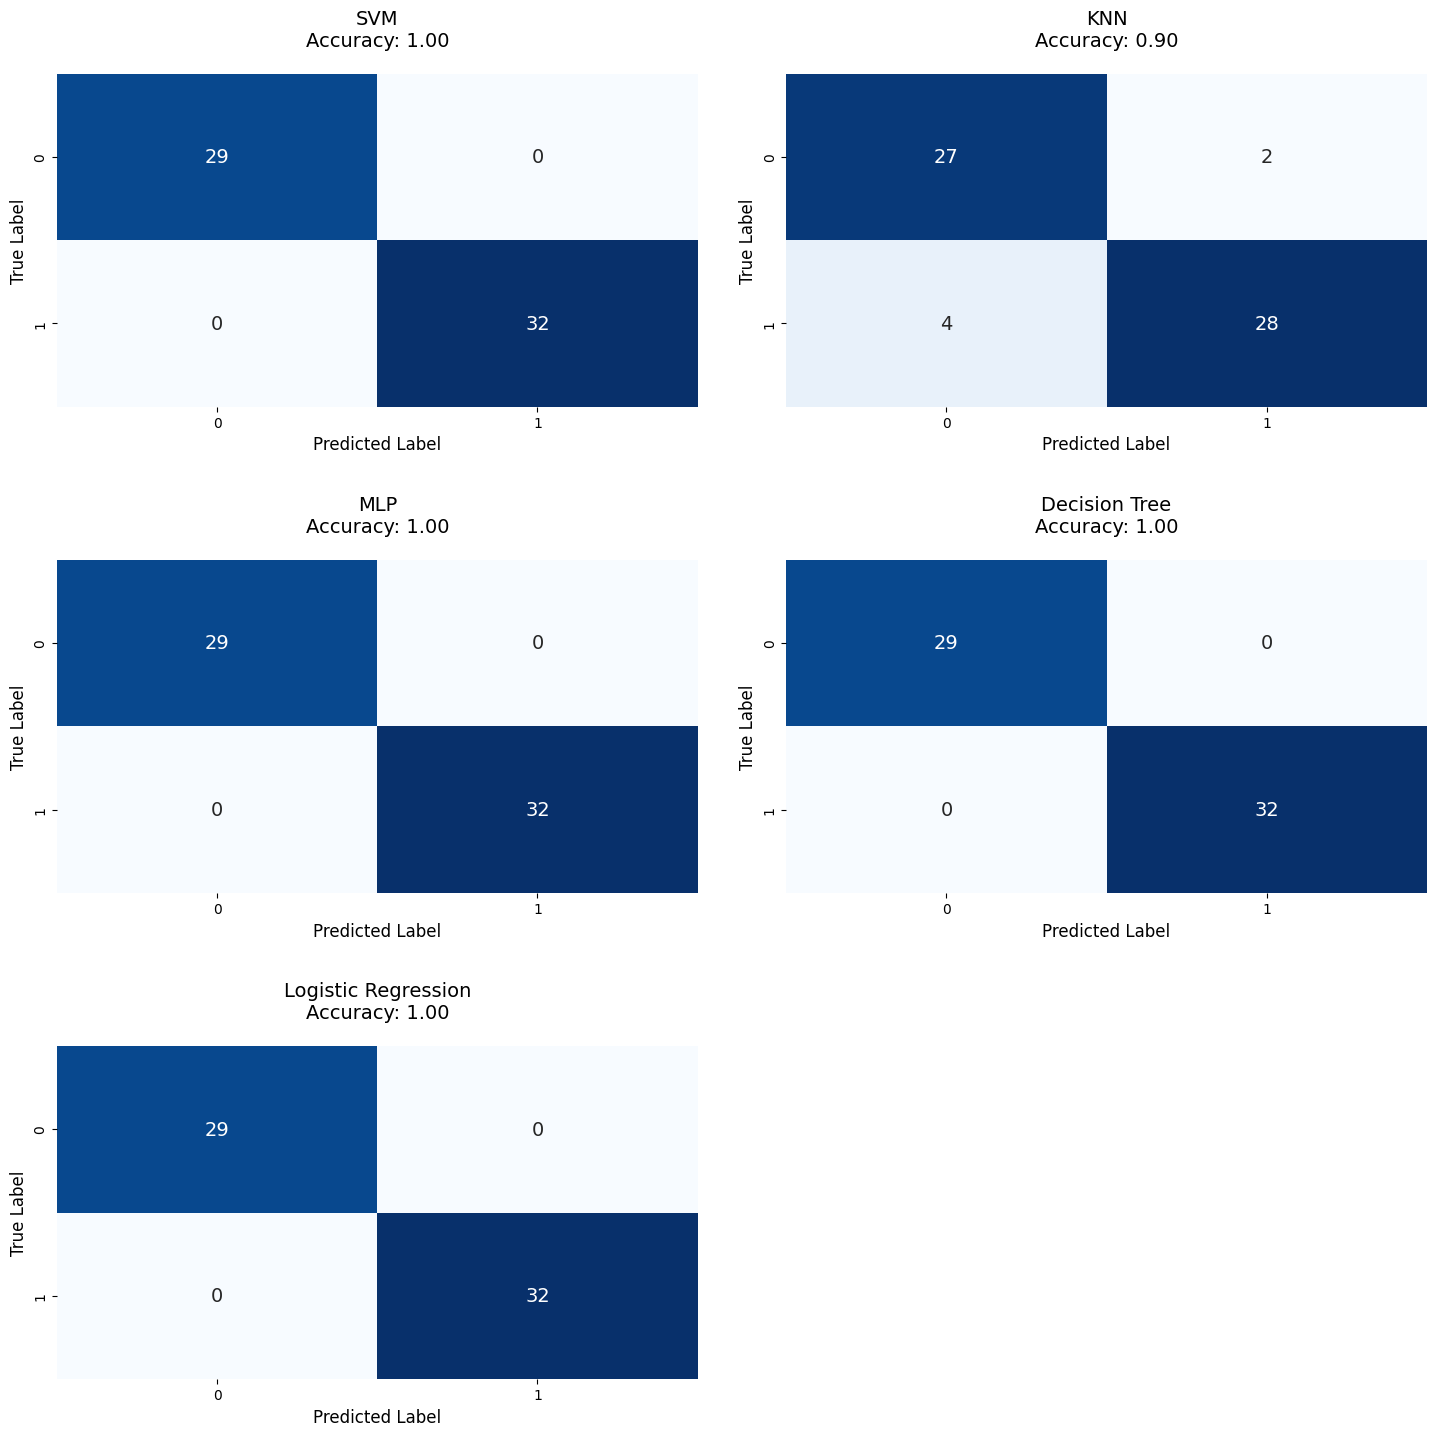

Model Comparison:
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |
|:--------------------|-----------:|------------:|---------:|-----------:|
| SVM                 |   1        |    1        |    1     |   1        |
| KNN                 |   0.901639 |    0.933333 |    0.875 |   0.903226 |
| MLP                 |   1        |    1        |    1     |   1        |
| Decision Tree       |   1        |    1        |    1     |   1        |
| Logistic Regression |   1        |    1        |    1     |   1        |


In [4]:
import pandas as pd
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/working/QIIMGA/filtered_dataset.csv')

# Split features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'SVM': svm.SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Create figure for confusion matrices
plt.figure(figsize=(18, 12))
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

# Train and evaluate models
for idx, (model_name, model) in enumerate(models.items()):
    # Train model
    model.fit(X_train, y_train)
    
    # Save model to specified directory
    model_path = f'/kaggle/working/PCA/heart_disease_{model_name.lower().replace(" ", "_")}_model.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics['Model'].append(model_name)
    accuracy = accuracy_score(y_test, y_pred)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], 
                annot_kws={'size': 14}, cbar=False)
    axes[idx].set_title(f'{model_name}\nAccuracy: {accuracy:.2f}', fontsize=14, pad=20)
    axes[idx].set_xlabel('Predicted Label', fontsize=12)
    axes[idx].set_ylabel('True Label', fontsize=12)
    axes[idx].tick_params(axis='both', which='major', labelsize=10)

# Hide unused subplots
for i in range(len(models), len(axes)):
    axes[i].axis('off')

# Adjust layout and save
plt.tight_layout(pad=3.0)
plt.savefig('/kaggle/working/QIIMGA/QIIMGA_confution.png', bbox_inches='tight', dpi=300)
plt.show()

# Create metrics DataFrame
metrics_df = pd.DataFrame(metrics)

# Print metrics table
print("Model Comparison:")
print(metrics_df.to_markdown(index=False))

Step 4:  seperately check using predefined data

In [20]:
import pandas as pd
import pickle

# List of all trained models
model_names = ['svm', 'knn', 'mlp', 'decision_tree', 'logistic_regression']

# Example data (replace with actual data)
new_data = [[0,1,136,91,1,498,152,0,38,2,2,2]]  # 12 features as per dataset

# Test all models
for model_name in model_names:
    # Load the model
    with open(f'heart_disease_QIIMGA{model_name}_model.pkl', 'rb') as f:
        loaded_model = pickle.load(f)
    
    # Make prediction
    prediction = loaded_model.predict(new_data)
    
    # Convert model name to readable format
    readable_name = model_name.replace('_', ' ').title()
    
    print(f"{readable_name} Prediction:", 
          "Heart Disease Detected (1)" if prediction[0] == 1 else "No Heart Disease (0)")

# Optional: Add probability outputs where available
print("\nProbability Outputs (where applicable):")
for model_name in model_names:
    try:
        with open(f'heart_disease_{model_name}_model.pkl', 'rb') as f:
            loaded_model = pickle.load(f)
            
            if hasattr(loaded_model, 'predict_proba'):
                proba = loaded_model.predict_proba(new_data)[0]
                readable_name = model_name.replace('_', ' ').title()
                print(f"{readable_name} Confidence: {max(proba)*100:.2f}%")
    except Exception as e:
        continue

Svm Prediction: No Heart Disease (0)
Knn Prediction: No Heart Disease (0)
Mlp Prediction: Heart Disease Detected (1)
Decision Tree Prediction: No Heart Disease (0)
Logistic Regression Prediction: No Heart Disease (0)

Probability Outputs (where applicable):


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


B. PCA feature selection and perfromed cross validation check different performance.

    step1: Applied PCA for feature selection 
     step2: FDiltered original dataset according to updated features.
    step3: Trained different model with the selected features and perfrom cross validation for checking model performance.

step1 : PCA for features selections 

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('/kaggle/input/heartdeases/updated_dataset.csv')

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']
features = X.columns.tolist()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Select components that explain 80% variance
n_components = np.where(cumulative_variance >= 0.8)[0][0] + 1

# Get feature importance from first 'n_components' PCs
feature_importance = np.abs(pca.components_[:n_components]).sum(axis=0)
sorted_idx = np.argsort(feature_importance)[::-1]

# Select top features (adjust k as needed)
k = 12  # Number of features to select
selected_features_idx = sorted_idx[:k]

# Sort features by original column index
sorted_indices = np.sort(selected_features_idx)
sorted_features = [features[i] for i in sorted_indices]

# Create reduced dataset
X_reduced = X.iloc[:, sorted_indices]

# Print results sorted by index
print("Selected Features (Sorted by Index):")
for idx, feature in zip(sorted_indices, sorted_features):
    print(f"Feature {idx}: {feature}")

print("\nCumulative Variance Explained:", cumulative_variance[n_components-1])
print("Reduced Dataset Shape:", X_reduced.shape)

Selected Features (Sorted by Index):
Feature 0: age
Feature 1: sex
Feature 3: bp
Feature 4: chol
Feature 6: fbs
Feature 7: restecg
Feature 8: thalach
Feature 9: exang
Feature 11: oldpeak
Feature 12: slope
Feature 13: ca
Feature 15: thal

Cumulative Variance Explained: 0.8170719132067977
Reduced Dataset Shape: (303, 12)


 step2: FDiltered original dataset according to updated features.

In [9]:
import pandas as pd

# Define the file path
file_path = "/kaggle/input/heartdeases/updated_dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Select the required columns
selected_columns = ['age','sex','bp', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak','exang', 'slope', 'ca', 'thal', 'target']
df_selected = df[selected_columns]

# Save the modified dataset
filtered_file_path = "/kaggle/working/PCA/pca_filtered_dataset.csv"
df_selected.to_csv(filtered_file_path, index=False)

# Return the new file path
filtered_file_path

'/kaggle/working/PCA/pca_filtered_dataset.csv'

 step 3: Trained different model with the selected features and perfrom cross validation for checking model performance.

<Figure size 1800x1200 with 0 Axes>

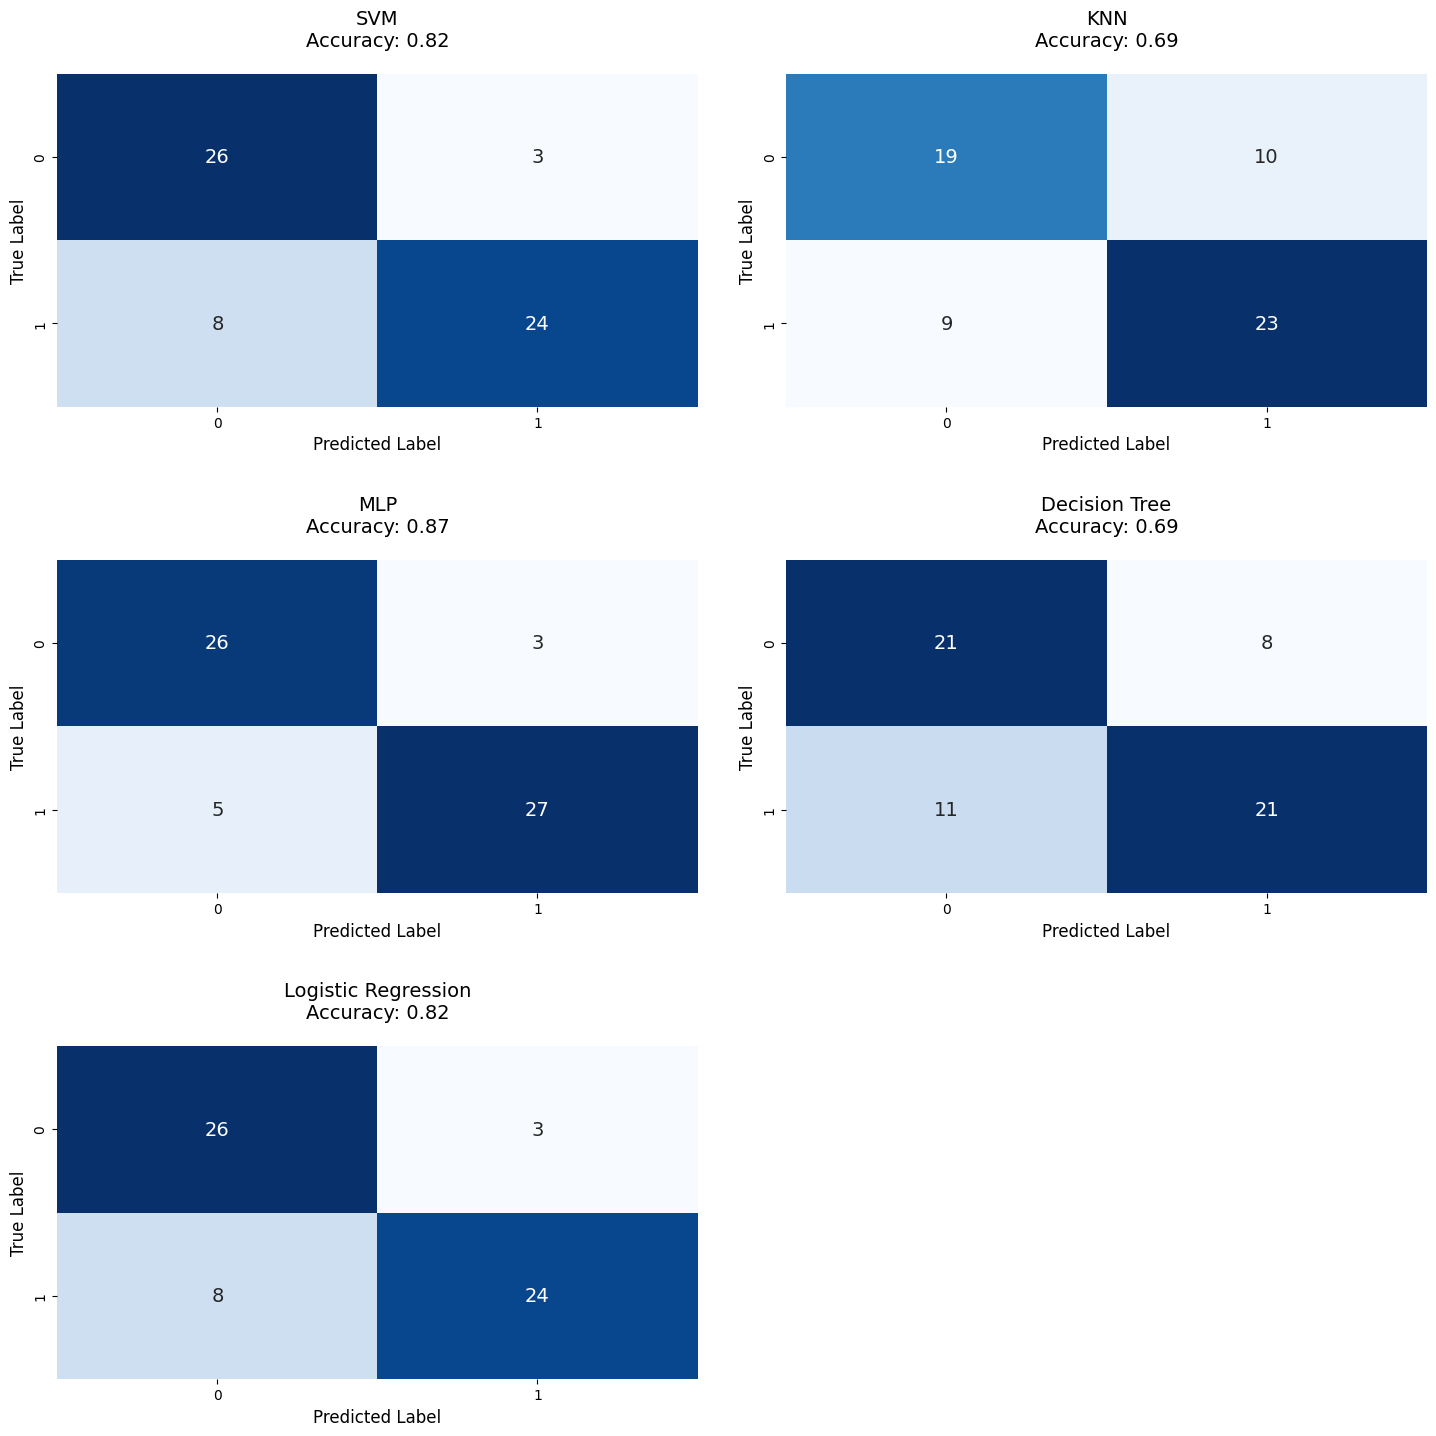

Model Comparison:
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |
|:--------------------|-----------:|------------:|---------:|-----------:|
| SVM                 |   0.819672 |    0.888889 |  0.75    |   0.813559 |
| KNN                 |   0.688525 |    0.69697  |  0.71875 |   0.707692 |
| MLP                 |   0.868852 |    0.9      |  0.84375 |   0.870968 |
| Decision Tree       |   0.688525 |    0.724138 |  0.65625 |   0.688525 |
| Logistic Regression |   0.819672 |    0.888889 |  0.75    |   0.813559 |


In [18]:
import pandas as pd
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/working/PCA/pca_filtered_dataset.csv')

# Split features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'SVM': svm.SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Create figure for confusion matrices
plt.figure(figsize=(18, 12))
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

# Train and evaluate models
for idx, (model_name, model) in enumerate(models.items()):
    # Train model
    model.fit(X_train, y_train)
    
    # Save model to specified directory
    model_path = f'/kaggle/working/PCA/heart_disease_{model_name.lower().replace(" ", "_")}_model.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics['Model'].append(model_name)
    accuracy = accuracy_score(y_test, y_pred)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], 
                annot_kws={'size': 14}, cbar=False)
    axes[idx].set_title(f'{model_name}\nAccuracy: {accuracy:.2f}', fontsize=14, pad=20)
    axes[idx].set_xlabel('Predicted Label', fontsize=12)
    axes[idx].set_ylabel('True Label', fontsize=12)
    axes[idx].tick_params(axis='both', which='major', labelsize=10)

# Hide unused subplots
for i in range(len(models), len(axes)):
    axes[i].axis('off')

# Adjust layout and save
plt.tight_layout(pad=3.0)
plt.savefig('/kaggle/working/PCA/PCA_confution.png', bbox_inches='tight', dpi=300)
plt.show()

# Create metrics DataFrame
metrics_df = pd.DataFrame(metrics)

# Print metrics table
print("Model Comparison:")
print(metrics_df.to_markdown(index=False))

In [2]:
# intalling libaries 
pip install dataframe-image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 70.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 38.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


C. Comarision table QIIMGA vs PCA

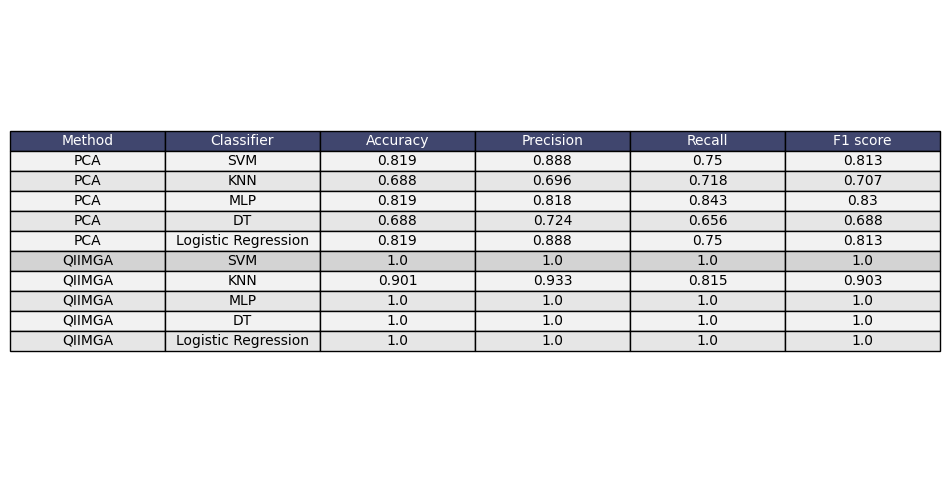

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame from the provided data
data = [
    {'Method': 'PCA', 'Classifier': 'SVM', 'Accuracy': 0.819, 'Precision': 0.888, 'Recall': 0.750, 'F1 score': 0.813},
    {'Method': 'PCA', 'Classifier': 'KNN', 'Accuracy': 0.688, 'Precision': 0.696, 'Recall': 0.718, 'F1 score': 0.707},
    {'Method': 'PCA', 'Classifier': 'MLP', 'Accuracy': 0.819, 'Precision': 0.818, 'Recall': 0.843, 'F1 score': 0.830},
    {'Method': 'PCA', 'Classifier': 'DT', 'Accuracy': 0.688, 'Precision': 0.724, 'Recall': 0.656, 'F1 score': 0.688},
    {'Method': 'PCA', 'Classifier': 'Logistic Regression', 'Accuracy': 0.819, 'Precision': 0.888, 'Recall': 0.750, 'F1 score': 0.813},
    {'Method': 'QIIMGA', 'Classifier': 'SVM', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 score': 1.0},
    {'Method': 'QIIMGA', 'Classifier': 'KNN', 'Accuracy': 0.901, 'Precision': 0.933, 'Recall': 0.815, 'F1 score': 0.903},
    {'Method': 'QIIMGA', 'Classifier': 'MLP', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 score': 1.0},
    {'Method': 'QIIMGA', 'Classifier': 'DT', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 score': 1.0},
    {'Method': 'QIIMGA', 'Classifier': 'Logistic Regression', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 score': 1.0},
]

df = pd.DataFrame(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axes
ax.axis('off')

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# Set table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Apply different colors to rows
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if key[0] == 0:
        cell.set_facecolor('#40466e')  # Header color
        cell.set_text_props(color='w')  # White text for header
    elif key[0] % 2 == 1:
        cell.set_facecolor('#f2f2f2')  # Light gray for odd rows
    else:
        cell.set_facecolor('#e6e6e6')  # Slightly darker gray for even rows

    # Highlight the empty row (separator) with a different color
    if key[0] == 6:  # The empty row is at index 6 (0-based)
        cell.set_facecolor('#d3d3d3')  # Light gray for the separator row

# Save the table as a PNG file
plt.savefig('/kaggle/working/Comparison/performance_table_with_separator.png', bbox_inches='tight', dpi=300)

# Show the table
plt.show()

D. Visulalize Performance comparision using Barchart

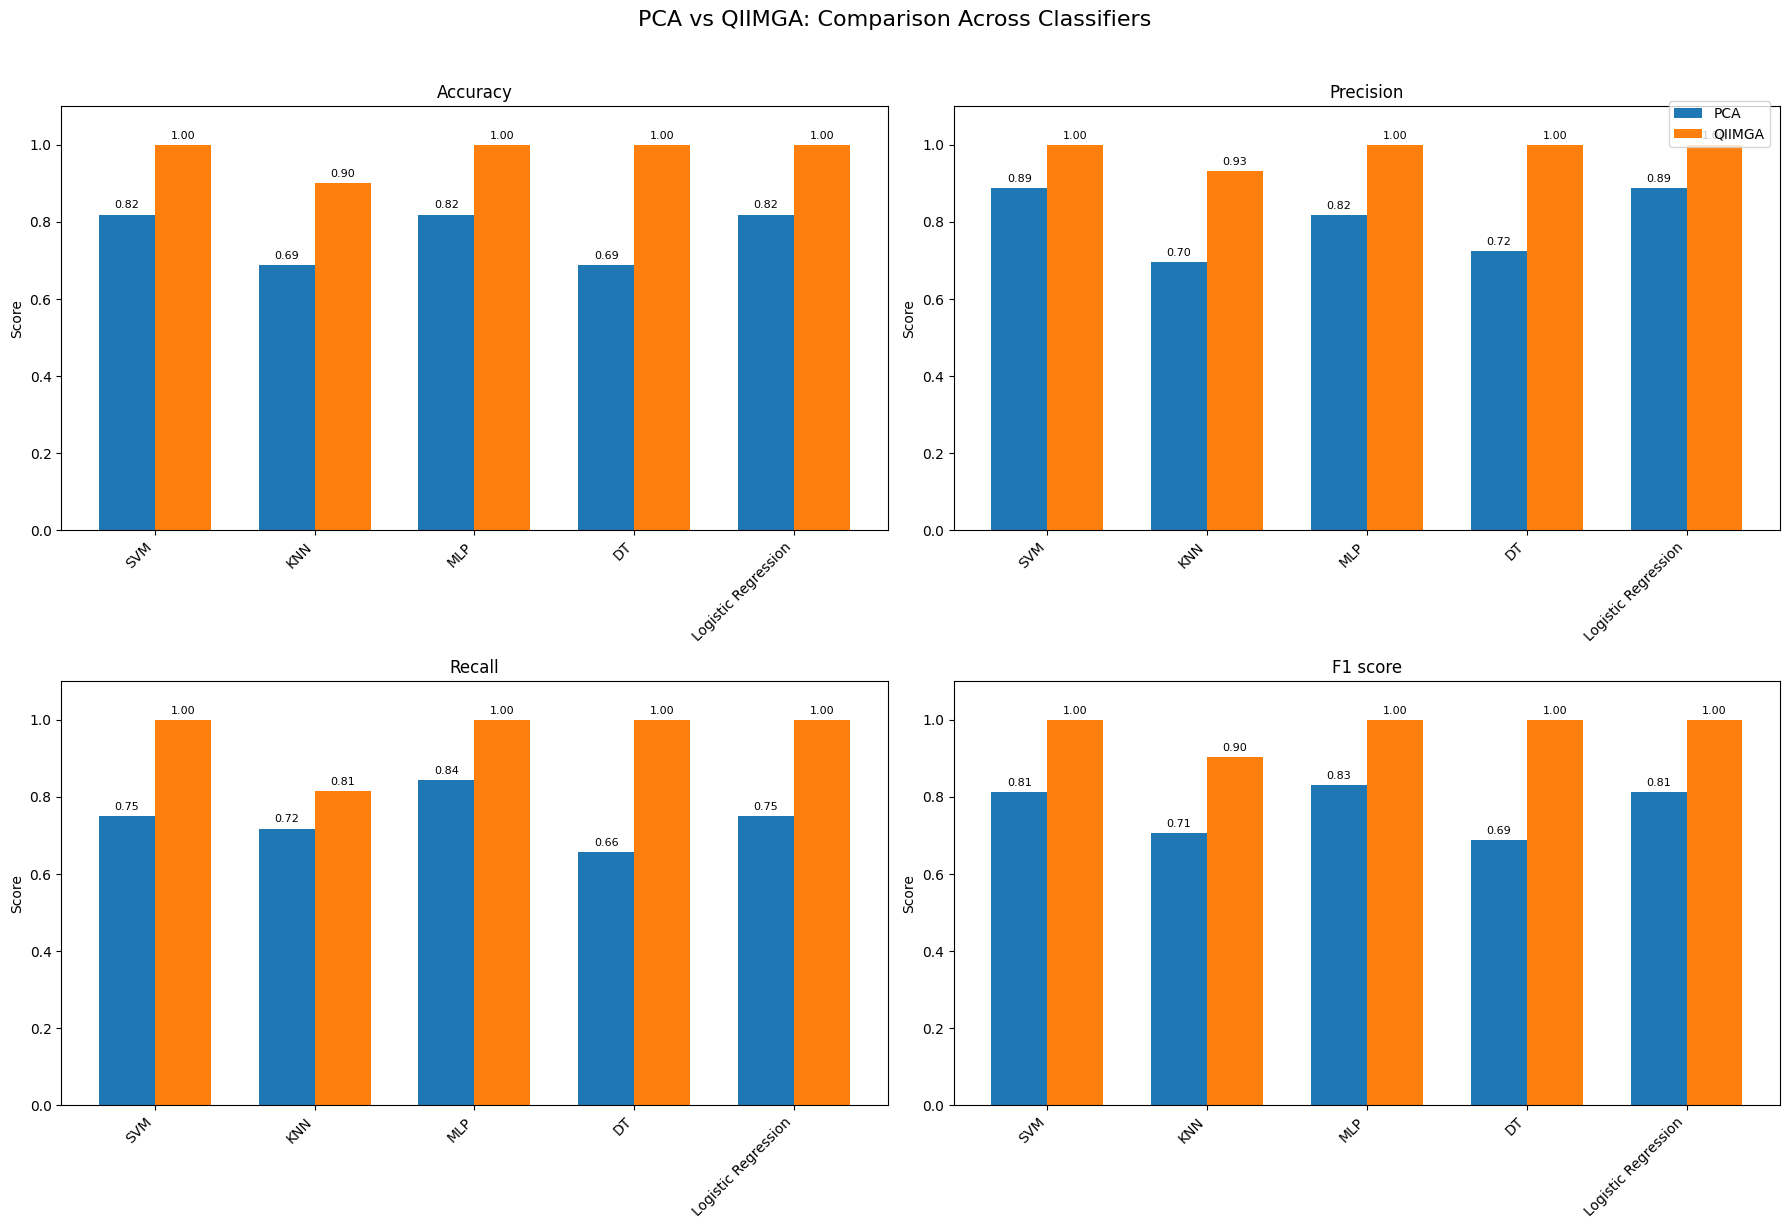

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the DataFrame from the provided data
data = [
    {'Method': 'PCA', 'Classifier': 'SVM', 'Accuracy': 0.819, 'Precision': 0.888, 'Recall': 0.750, 'F1 score': 0.813},
    {'Method': 'PCA', 'Classifier': 'KNN', 'Accuracy': 0.688, 'Precision': 0.696, 'Recall': 0.718, 'F1 score': 0.707},
    {'Method': 'PCA', 'Classifier': 'MLP', 'Accuracy': 0.819, 'Precision': 0.818, 'Recall': 0.843, 'F1 score': 0.830},
    {'Method': 'PCA', 'Classifier': 'DT', 'Accuracy': 0.688, 'Precision': 0.724, 'Recall': 0.656, 'F1 score': 0.688},
    {'Method': 'PCA', 'Classifier': 'Logistic Regression', 'Accuracy': 0.819, 'Precision': 0.888, 'Recall': 0.750, 'F1 score': 0.813},
    {'Method': 'QIIMGA', 'Classifier': 'SVM', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 score': 1.0},
    {'Method': 'QIIMGA', 'Classifier': 'KNN', 'Accuracy': 0.901, 'Precision': 0.933, 'Recall': 0.815, 'F1 score': 0.903},
    {'Method': 'QIIMGA', 'Classifier': 'MLP', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 score': 1.0},
    {'Method': 'QIIMGA', 'Classifier': 'DT', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 score': 1.0},
    {'Method': 'QIIMGA', 'Classifier': 'Logistic Regression', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 score': 1.0},
]


df = pd.DataFrame(data)

# Metrics to visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
classifiers = df['Classifier'].unique()  # Maintain original order
methods = ['PCA', 'QIIMGA']

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('PCA vs QIIMGA: Comparison Across Classifiers', fontsize=16, y=1.02)

# Define bar width and positions
bar_width = 0.35
x = np.arange(len(classifiers))  # Classifier labels based on original order

# Colors for PCA and QIIMGA
colors = {'PCA': '#1f77b4', 'QIIMGA': '#ff7f0e'}

# Plot each metric in a separate subplot
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    
    # Extract data for PCA and QIIMGA without sorting
    pca_values = df[df['Method'] == 'PCA'].groupby('Classifier', sort=False)[metric].mean()
    qiimga_values = df[df['Method'] == 'QIIMGA'].groupby('Classifier', sort=False)[metric].mean()
    
    # Plot bars
    bars_pca = ax.bar(x - bar_width/2, pca_values, width=bar_width, color=colors['PCA'], label='PCA')
    bars_qiimga = ax.bar(x + bar_width/2, qiimga_values, width=bar_width, color=colors['QIIMGA'], label='QIIMGA')
    
    # Add labels and titles
    ax.set_title(metric, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(classifiers, rotation=45, ha='right')
    ax.set_ylim(0, 1.1)
    ax.set_ylabel('Score')
    
    # Add value labels on top of bars
    for bar in bars_pca + bars_qiimga:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Add legend and adjust layout
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.99, 0.95))
plt.tight_layout()

# Save the plot
plt.savefig('/kaggle/working/Comparison/pca_vs_qiimga_classifiers_comparison.png', dpi=300, bbox_inches='tight')
plt.show()